# Support Vector Machine Model
##### Authors: Diego Senso González, Luis Vaciero
##### 4 december 2020
##### Module: Machine Learning - Master's Degree Data Science for Finance
We are going to fit a SVM model to predict if the loan is going to be paid or not based on the data we have about each loan given by the bank. SVM are supervised learning models to analyze data, classificate and make predictions. This kind of models use the statistics of support vectors, and they are more advanced than Logistic Regression, which has been done in another document.

## Libraries
We load required libraries to fit these models.

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib
from matplotlib import pyplot as plt
from scipy import stats as sts
from sklearn import model_selection
from sklearn import linear_model
from sklearn import metrics
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import Lasso, LassoCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.ensemble import IsolationForest
from math import sqrt
import itertools
import math
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import roc_curve, roc_auc_score, plot_roc_curve
from sklearn.datasets import make_classification
import random
random.seed(1234)
from sklearn.impute import KNNImputer
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

We load the data once we have cleaned it in previous steps.

In [95]:
#Loading data
loan = pd.read_csv("../notebooks/loan_lasso.csv", delimiter = ',')
loan

,Unnamed: 0,loan_status,num_rev_tl_bal_gt_0,D,sec_app_chargeoff_within_12_mths,dti,F,sec_app_inq_last_6mths,mort_acc,B,...,sec_app_open_acc,open_acc,sec_app_mort_acc,sec_app_open_act_il,G,A,policy_code,num_rev_accts,E,num_bc_sats
0,8,1.0,9.0,0,0.0,16.99,0,0.0,2.0,0,...,0.0,20.0,0.0,0.0,0,1,1.0,32.0,0,9.0
1,10,1.0,2.0,0,0.0,6.07,0,0.0,0.0,0,...,0.0,4.0,0.0,0.0,0,0,1.0,3.0,1,3.0
2,24,1.0,11.0,0,0.0,13.12,0,0.0,4.0,0,...,0.0,19.0,0.0,0.0,0,1,1.0,15.0,0,12.0
3,42,1.0,7.0,0,0.0,10.11,0,0.0,0.0,0,...,0.0,15.0,0.0,0.0,0,0,1.0,17.0,0,7.0
4,91,1.0,1.0,0,0.0,10.86,0,0.0,1.0,0,...,0.0,4.0,0.0,0.0,0,0,1.0,6.0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
462220,421088,1.0,7.0,1,0.0,27.08,0,0.0,0.0,0,...,0.0,9.0,0.0,0.0,0,0,1.0,13.0,0,7.0
462221,421089,0.0,8.0,0,0.0,23.69,0,0.0,1.0,1,...,0.0,13.0,0.0,0.0,0,0,1.0,20.0,0,4.0
462222,421092,0.0,6.0,1,0.0,30.90,0,0.0,0.0,0,...,0.0,9.0,0.0,0.0,0,0,1.0,10.0,0,4.0
462223,421093,0.0,7.0,0,0.0,27.19,0,0.0,0.0,0,...,0.0,17.0,0.0,0.0,0,0,1.0,16.0,1,7.0


We delete first column which does not useful values

In [96]:
loan = loan.drop(loan.columns[[0]], axis='columns')
loan

,loan_status,num_rev_tl_bal_gt_0,D,sec_app_chargeoff_within_12_mths,dti,F,sec_app_inq_last_6mths,mort_acc,B,tax_liens,...,sec_app_open_acc,open_acc,sec_app_mort_acc,sec_app_open_act_il,G,A,policy_code,num_rev_accts,E,num_bc_sats
0,1.0,9.0,0,0.0,16.99,0,0.0,2.0,0,0.0,...,0.0,20.0,0.0,0.0,0,1,1.0,32.0,0,9.0
1,1.0,2.0,0,0.0,6.07,0,0.0,0.0,0,0.0,...,0.0,4.0,0.0,0.0,0,0,1.0,3.0,1,3.0
2,1.0,11.0,0,0.0,13.12,0,0.0,4.0,0,0.0,...,0.0,19.0,0.0,0.0,0,1,1.0,15.0,0,12.0
3,1.0,7.0,0,0.0,10.11,0,0.0,0.0,0,0.0,...,0.0,15.0,0.0,0.0,0,0,1.0,17.0,0,7.0
4,1.0,1.0,0,0.0,10.86,0,0.0,1.0,0,0.0,...,0.0,4.0,0.0,0.0,0,0,1.0,6.0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
462220,1.0,7.0,1,0.0,27.08,0,0.0,0.0,0,0.0,...,0.0,9.0,0.0,0.0,0,0,1.0,13.0,0,7.0
462221,0.0,8.0,0,0.0,23.69,0,0.0,1.0,1,0.0,...,0.0,13.0,0.0,0.0,0,0,1.0,20.0,0,4.0
462222,0.0,6.0,1,0.0,30.90,0,0.0,0.0,0,0.0,...,0.0,9.0,0.0,0.0,0,0,1.0,10.0,0,4.0
462223,0.0,7.0,0,0.0,27.19,0,0.0,0.0,0,0.0,...,0.0,17.0,0.0,0.0,0,0,1.0,16.0,1,7.0


## Model

### Fitting

We separate the dataset in X and Y variables to create training set and test set after.

In [97]:
# endógena

endogena = ['loan_status'] 

# exógenas

exogenas = list(set(list(loan.columns))-set(endogena))

X = loan[exogenas].values
Y = loan[endogena].values

We take a sample using SMOTE function which was imported previously. This will use 20% to test set and the rest 80% for train test. After this we see the dimensions of each set of data. Our model will train with 387126 variables and will try to predict 92445 different loans.

In [98]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=40)
sm = SMOTE(random_state=40, sampling_strategy = 0.4)
X_train, Y_train = sm.fit_sample(X_train, Y_train)
print(X_train.shape); print(X_test.shape)

(387126, 23)
(92445, 23)


Now we set our Y variable in test and train set and we see how many clients of each type there are in each set. We see that there is some difference but we do not consider that we have a huge desbalanced dataset.

In [99]:
ytrain_df = pd.DataFrame(Y_train, columns = ['loan_status'])
ytest_df = pd.DataFrame(Y_test, columns = ['loan_status'])

In [100]:
ytrain_df['loan_status'].value_counts(normalize=True)

1.0    0.714287
0.0    0.285713
Name: loan_status, dtype: float64

In [101]:
ytest_df['loan_status'].value_counts(normalize=True)

1.0    0.745881
0.0    0.254119
Name: loan_status, dtype: float64

We fit the Support Vector Machine model with some initial parameters:

In [12]:
%%time
param_test3 = {'C': [1, 10], 'kernel': ('linear', 'rbf')}
gsearch_SVM = GridSearchCV(estimator=SVC(max_iter = 1000),
             param_grid= param_test3 , scoring='roc_auc', n_jobs=-1, iid=False, cv=5)
gsearch_SVM.fit(X_train, Y_train)

C:\Users\diego\anaconda3\envs\gradiente\lib\site-packages\sklearn\model_selection\_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


Wall time: 3min 26s


C:\Users\diego\anaconda3\envs\gradiente\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


GridSearchCV(cv=5, estimator=SVC(max_iter=1000), iid=False, n_jobs=-1,
             param_grid={'C': [1, 10], 'kernel': ('linear', 'rbf')},
             scoring='roc_auc')

Now we check which are the best parameters to fit this model, and we fit a new SVM model with these best estimators  called "gsearch_SVM2".

In [13]:
gsearch_SVM.best_estimator_

SVC(C=10, max_iter=1000)

In [14]:
%%time
gsearch_SVM2 = gsearch_SVM.best_estimator_
gsearch_SVM2.fit(X_train, Y_train)

Wall time: 43.8 s


C:\Users\diego\anaconda3\envs\gradiente\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


SVC(C=10, max_iter=1000)

We make predictions and we print confussion matrix and classification report in order to see how the model classifies each value of loan_status variable.

In [15]:
Y_pred_gsearch_SVM2 = gsearch_SVM2.predict(X_test)
print(confusion_matrix(Y_test,Y_pred_gsearch_SVM2))
print(classification_report(Y_test,Y_pred_gsearch_SVM2))

[[ 9478 14014]
 [22401 46552]]
              precision    recall  f1-score   support

         0.0       0.30      0.40      0.34     23492
         1.0       0.77      0.68      0.72     68953

    accuracy                           0.61     92445
   macro avg       0.53      0.54      0.53     92445
weighted avg       0.65      0.61      0.62     92445



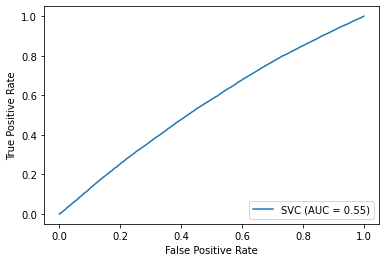

SVM score train:  0.597758869205375
SVM score:  0.6060901076315647


In [16]:
metrics.plot_roc_curve(gsearch_SVM2, X_test, Y_test)
plt.show() 
print("SVM score train: ", gsearch_SVM2.score(X_train, Y_train))
print("SVM score: ", gsearch_SVM2.score(X_test, Y_test))

We see the results. Our SVM model has an accuracy of 77% predicting borrowers who pay the loan back. In contrast, we have just 30% accuracy predicting clients who are not going to pay in time. The AUC indicator is considerably lower than Logistic Regression model, but the total score is slightly lower (60.6%).

### Saving

Now we save the model in order to use for different dataset from the given ones. This will save a lot of time because it will not be necessary to wait to train the model again.

In [17]:
#We import pickle to save the model and use it later with new data
import pickle
filename = 'svm.sav'
pickle.dump(gsearch_SVM2, open (filename, 'wb'))
model = pickle.load(open('svm.sav', 'rb'))
model

SVC(C=10, max_iter=1000)

### Loading and predicting new data

With this code we will be able to load the model we saved in the last step and apply it to new data. When we load the new data we will be able to check the accuracy predicting the new observations.

In [102]:
#Load model and obtain accuracy for new dataset
model2 = pickle.load(open('svm.sav', 'rb'))
result = model2.score(X_test, Y_test)
print("Accuracy: %.2f%%" % (result * 100.0))

Accuracy: 60.61%
